In [290]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [291]:
phase_scan = pd.read_csv("dc_1.csv")
heating_voltage = phase_scan["Heating"]
detector_1 = phase_scan["Detector 1"]
detector_2 = phase_scan["Detector 2"]
detector_3 = phase_scan["Detector 3"]

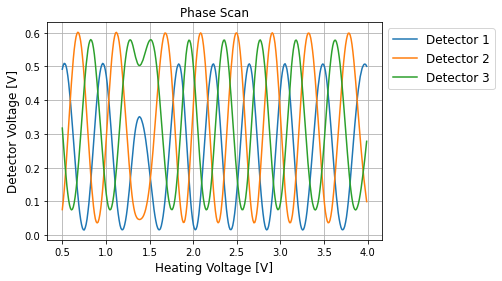

In [292]:
plt.plot(heating_voltage, detector_1, label="Detector 1")
plt.plot(heating_voltage, detector_2, label="Detector 2")
plt.plot(heating_voltage, detector_3, label="Detector 3")
plt.xlabel("Heating Voltage [V]", fontsize=12)
plt.ylabel("Detector Voltage [V]", fontsize=12)
plt.legend(fontsize=12, bbox_to_anchor=(1,1))
plt.grid(True)
plt.title("Phase Scan", fontsize=12)
plt.show()

In [293]:
def scale_data(data):
    return 2 * (data - min(data)) / (max(data) - min(data)) - 1

In [294]:
dc_scaled = [scale_data(detector_1), scale_data(detector_2), scale_data(detector_3)]

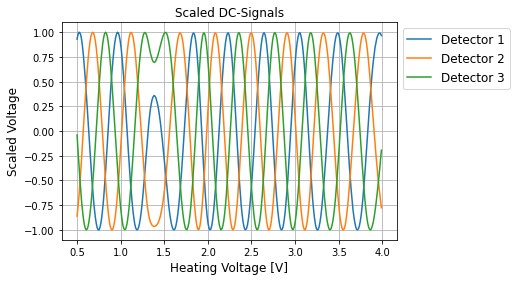

In [295]:
plt.plot(heating_voltage, dc_scaled[0], label="Detector 1")
plt.plot(heating_voltage, dc_scaled[1], label="Detector 2")
plt.plot(heating_voltage, dc_scaled[2], label="Detector 3")
plt.legend(fontsize=12, bbox_to_anchor=(1,1))
plt.grid(True)
plt.xlabel("Heating Voltage [V]", fontsize=12)
plt.ylabel("Scaled Voltage", fontsize=12)
plt.title("Scaled DC-Signals", fontsize=12)
plt.show()

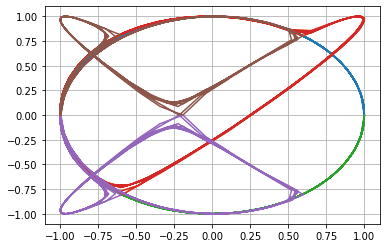

In [296]:
X = []
Y = []
theta= [0, 4.06982381332333, 1.99833324916716]

for i in range(3):
    X.append(dc_scaled[i] * np.cos(theta[i]) + np.sqrt(1 - dc_scaled[i] ** 2) * np.sin(theta[i]))
    X.append(dc_scaled[i] * np.cos(theta[i]) - np.sqrt(1 - dc_scaled[i] ** 2) * np.sin(theta[i]))
    Y.append(dc_scaled[i] * np.sin(theta[i]) - np.sqrt(1 - dc_scaled[i] ** 2) * np.cos(theta[i]))
    Y.append(dc_scaled[i] * np.sin(theta[i]) + np.sqrt(1 - dc_scaled[i] ** 2) * np.cos(theta[i]))

for i in range(3):
    for j in range(3):
        if i != j:
            plt.plot(X[i], Y[j])

plt.grid(True)
plt.show()

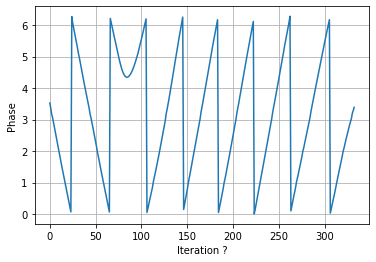

In [297]:
x = []
y = []
for i in range(len(X[0])):
    current_error_x = 6
    current_error_y = 6
    indices_x = None
    indices_y = None
    for j in range(6):
        for k in range(j + 1, 6):
            for l in range(k + 1, 6):
                error_x = abs(X[j][i] - X[k][i]) + abs(X[j][i] - X[l][i]) + abs(X[l][i] - X[k][i])
                error_y = abs(Y[j][i] - Y[k][i]) + abs(Y[j][i] - Y[l][i]) + abs(Y[l][i] - Y[k][i])
                if current_error_x > error_x:
                    indices_x = (j, k, l)
                    current_error_x = error_x
                if current_error_y > error_y:
                    indices_y = (j, k, l)
                    current_error_y = error_y
    x.append(np.mean([X[indices_x[0]][i], X[indices_x[1]][i], X[indices_x[2]][i]]))
    y.append(np.mean([Y[indices_y[0]][i], Y[indices_y[1]][i], Y[indices_y[2]][i]])) 

#plt.plot(x, y)
phi = np.arctan2(y, x)
plt.plot(range(len(phi)), phi + np.pi)
plt.xlabel("Iteration ?")
plt.ylabel("Phase")
plt.grid(True)
plt.savefig("Phase.pdf")


In [298]:
theta = [np.arccos(dc_scaled[0]) + np.arccos(dc_scaled[1]),
         np.arccos(dc_scaled[0]) - np.arccos(dc_scaled[1]),
         -np.arccos(dc_scaled[0]) + np.arccos(dc_scaled[1]),
         -np.arccos(dc_scaled[0]) - np.arccos(dc_scaled[1])]

theta_2 = [np.arccos(dc_scaled[0]) + np.arccos(dc_scaled[2]),
          -np.arccos(dc_scaled[0]) + np.arccos(dc_scaled[2]),
          np.arccos(dc_scaled[0]) - np.arccos(dc_scaled[2]),
          -np.arccos(dc_scaled[0]) - np.arccos(dc_scaled[2]),]

for i in range(len(theta)):
    theta[i] =  list([theta[i][j] if theta[i][j] >= 0 else theta[i][j] + 2 * np.pi for j in range(len(theta[i]))])

for i in range(len(theta)):
    theta_2[i] = list([theta_2[i][j] if theta_2[i][j] >= 0 else theta_2[i][j] + 2 * np.pi for j in range(len(theta_2[i]))])

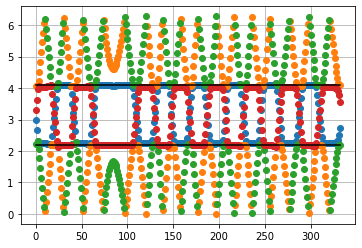

In [299]:
for i in range(len(theta)):
    plt.plot(range(len(theta[i])), theta[i], "o")

plt.plot(range(len(theta[0])), 2.186898083066153 * np.ones(len(theta[0])), "black")
plt.plot(range(len(theta[0])), 4.096287224113433 * np.ones(len(theta[0])), "black")
plt.grid()
plt.savefig("system_phase_1.pdf")

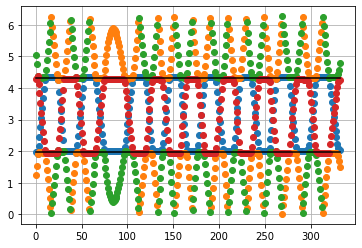

In [300]:
for i in range(len(theta)):
    plt.plot(range(len(theta_2[i])), theta_2[i], "o")

plt.plot(range(len(theta[0])), 4.30263692885744 * np.ones(len(theta[0])), "black")
plt.plot(range(len(theta[0])), 1.980548378322145 * np.ones(len(theta[0])), "black")
plt.grid()
plt.savefig("system_phase_2.pdf")

In [301]:
for i in range(len(theta)):
    theta[i] = list(filter(lambda x: abs(x - 4 * np.pi / 3) <= 0.8, theta[i]))
    
for i in range(len(theta)):
    theta_2[i] = list(filter(lambda x: abs(x - 2 * np.pi / 3) <= 0.8, theta_2[i]))

means_theta_1 = []
means_theta_2 = []
for i in range(len(theta)):
    means_theta_1.append(np.mean(theta[i]))
    means_theta_2.append(np.mean(theta_2[i]))

print(np.mean(means_theta_1))
print(np.mean(means_theta_2))

4.161468033263923
1.979487438059833
